## Conda Installation 

 Anaconda is recommended to manage the various toolkits in Python. 
 1. First of all, you can download it from the website https://www.anaconda.com/products/individual and choose the version that corresponds to the computer system you are currently using. 
 2. Once downloaded, you need to add the path where Anaconda is stored to the global variable

Create a virtual env named torch with python 3.8

`conda create --name gnn python=3.8 -y`

activate the created enviorment 

`conda activate gnn`

Installation of necessary toolkits, in terminal paste them, in notebook use !pip or ##bash

`pip install torch torchvision`

`pip install matplotlib`

Next, you need to add conda enviorment in your notebook to finish following tasks.
`conda install -c anaconda ipykernel`

`python -m ipykernel install --user --name=gnn`

`jupyter notebook` #conda notebook, find your enviorment under "kernel"

# Deep Learning - Basic 

Jupyter Notebook Installation please refer to https://www.jianshu.com/p/91365f343585 

In [1]:
# install pytorch, torchvision, matplotlib
import torch
from torch import nn
import torch.nn.functional as F 

## 0. PyTorch Basic
PyTorch is the mose welcome DL framework in acedemic community. Comparing with Tensorflow, PyTorch is based on dynamic computation graph, implying that it rebuilds a new computational when forward computation is performed. So your code behaves more pythonic. 

### 0.1 Tensor Class
Similar to numpy.array, the core class in Pytorch is Tensor. It is defined to be a multi-dimensional class, representating one- and high-dimensional matrix in machine learning computing. 

In [2]:
# random tensor with special is used to initialize the neural network 
a = torch.randn((2, 3))
print(a)
b = torch.ones((2, 3))
print(b)
print(a + b)

tensor([[-0.1190, -0.2415, -0.3293],
        [ 2.4542,  0.8481, -2.7512]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[ 0.8810,  0.7585,  0.6707],
        [ 3.4542,  1.8481, -1.7512]])


In [3]:
a.add(b)
c = torch.ones((3, 2))
print(c)
print(a.mm(c))  

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([[-0.6897, -0.6897],
        [ 0.5512,  0.5512]])


In [4]:
a.to('cpu') # configurate the device; default cpu 
# a.to('cuda') 
# a.cuda(device:int)

tensor([[-0.1190, -0.2415, -0.3293],
        [ 2.4542,  0.8481, -2.7512]])

### 0.2 PyTorch Backpropagation

#### 0.2.1 Autograd

In [5]:
# we create a tensor, where its gradient w.r.t. loss is required，记为a_（和前面的a区别开）
a_ = torch.ones((2,2), requires_grad=True)
a_

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [6]:
b_ = a_ + 1
b_

tensor([[2., 2.],
        [2., 2.]], grad_fn=<AddBackward0>)

In [7]:
# create a form of loss, so we can calculate the gradient, for example sum_
sum_ = b_.sum()
sum_

tensor(8., grad_fn=<SumBackward0>)

In [8]:
sum_.backward()

In [9]:
# A1 for Q1.
a_.grad
# Q2 what is value of backward() now and why?

tensor([[1., 1.],
        [1., 1.]])

### 0.2.2 PyTorch Optimizer
With given gradient to each weight and bias in the neural network, you can update them to achieve better performance. There are several optimizers available in Pytorch https://pytorch.org/docs/stable/optim.html. Two widely accepted optimizers are Adam and RMSProp. Choosing an optimizer as well as a hyperparameter depends on the distribution of the data and model as well as the engineer's experience. Fortunately, there are some general rules and basic theory can help you to build a successful model faster, but beyond the scope of this course. Refer to https://www.coursera.org/learn/deep-neural-network?skipBrowseRedirect=true

In [10]:
param = nn.Parameter(torch.ones(2,2))
optimizer0 = torch.optim.SGD([param], lr=0.1)

In [11]:
# random defined loss 
loss0 = (param**2).sum()

In [12]:
# before performing backward for the network please clear the gradient using zero_grad()
optimizer0.zero_grad() 
loss0.backward()
optimizer0.step()
print(param)

Parameter containing:
tensor([[0.8000, 0.8000],
        [0.8000, 0.8000]], requires_grad=True)


In [13]:
# E1: Please write a random loop and Q3 which factors is relevant to the convergence speed.
for i in range(20):
    optimizer0.zero_grad()
    loss0 = (param**2).sum()
    loss0.backward()
    optimizer0.step()
    print('loss value: {:.2f}'.format(loss0.item()))
print('updated params：', param)

loss value: 2.56
loss value: 1.64
loss value: 1.05
loss value: 0.67
loss value: 0.43
loss value: 0.27
loss value: 0.18
loss value: 0.11
loss value: 0.07
loss value: 0.05
loss value: 0.03
loss value: 0.02
loss value: 0.01
loss value: 0.01
loss value: 0.00
loss value: 0.00
loss value: 0.00
loss value: 0.00
loss value: 0.00
loss value: 0.00
updated params： Parameter containing:
tensor([[0.0092, 0.0092],
        [0.0092, 0.0092]], requires_grad=True)


## 1. Probe Project CNN

MNIST is one of the oldest image datasets, containing 10 kinds of characters. Based on this dataset, you need to implement a classifier which character contained in each image. 
# Q4: what is your loss function, and metrics, why?

You dont need to download and preproces MNIST from scratch, it is available in torchvision. 

In [14]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

data_train = datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor())
data_test = datasets.MNIST('data', train=False, download=True, transform=transforms.ToTensor())

In [15]:
img, label = data_train[0] 
img.size() 

torch.Size([1, 28, 28])

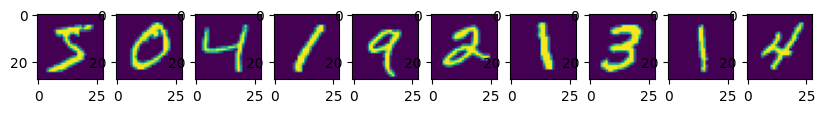

In [16]:
# visualize first 10 samples 
plt.figure(figsize=(10, 2))
for i in range(10):
    img, label = data_train[i]
    img = img.numpy().squeeze() # 用squeeze()函数将img的size从（1，28，28）变成（28，28），从而方便可视化
    plt.subplot(1, 10, i+1)
    plt.imshow(img)

### 2.1. Create your Neural Network using Matrix Operation.

### 2.1.1 Matrix Operation helps you understand better

Your Warm-Up exercise is to implement a multilayer perceptron. 
```
# PseudoCode
class MLP:
    def __init__(self):
        self.layer1 = xxx
        self.layer2 = xxx
    
    def forward(self, x): # x input 
        #  self.layer1
        # nonlinear activation function 
        # self.layer2 
        return something
```

## Linear Layer 
$\hat{y}= \sigma (W*x+b)$ 

In [17]:
class Linear(nn.Module): # inherit torch.nn.Module
    def __init__(self, in_features, out_features, ):
        super(Linear, self).__init__() # super() # same as nn.Module.__init__(self)
        self.weight = nn.Parameter(torch.randn(in_features, out_features)) 
        self.bias = nn.Parameter(torch.randn(out_features))
        
    def forward(self, x): # x: input 
        # Your code 
        x = x.mm(self.weight) 
        return x + self.bias

1. Inheriting `nn.Module`(`torch.nn.Module`) while building your linear layer brings you lots of rewards. You can use/reload `eval()`、`to()`as well as initializing function `super(Linear, self).__init__()`；
1. Right initializing method will save your training process time to converge and yield slightly better performance. `torch.randn()`
1. #Q5 should we use Softmax layer at the end?

In [18]:
class MLP(nn.Module):
    def __init__(self, in_features, hidden_features, out_features):
        super(MLP, self).__init__()
        # Your code
        self.in_features = in_features
        self.layer1 = Linear(in_features, hidden_features)  
        self.layer2 = Linear(hidden_features, out_features)
        
    def forward(self,x):
        # transform your input image into tensor
        x = x.view(-1, self.in_features)
        x = self.layer1(x)
        x = F.relu(x)
        return self.layer2(x)

### 2.1.2 Neural layer in Pytorch
Next we will use the linear layer defined in PyTorch directly (`torch.nn.Linear`) instead of defining it manually.

### 2.1.3 Foward propogation

In [35]:
# Please implement forward propogation using one image
img, label = data_train[0]
img = img.view(-1)  # transform input into vector (1,28,28) --> (784,)
feat_dim = len(img) 
num_classes = 10
model = MLP(in_features=feat_dim, hidden_features=256, out_features=num_classes)
img.shape

torch.Size([784])

In [37]:
t = img.view(-1, 2)
t[0][0] = 1
img[0][0]

tensor(1.)

In [20]:
model

MLP(
  (layer1): Linear()
  (layer2): Linear()
)

In [21]:
# config the device of model
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [22]:
device

'cpu'

In [23]:
# data and model must configurated to be the same device
model = model.to(device) 
img = img.to(device)  

In [24]:
output = model(img)
output

tensor([[  24.8122,   33.4462,   -9.9727, -190.9121,  117.9582,   28.7875,
           51.4292,   75.1379, -160.5095, -233.7135]], grad_fn=<AddBackward0>)

# Machine learning Classifier

In [25]:
# We choose the class has maximized probability and compare with ground truth.
predicted = output.argmax()
print('Predicted:', predicted.item(), '; Ground truth:', label)

Predicted: 4 ; Ground truth: 5


### 2.2 Train Loop
The parameters in the model have not been optimised, so the predictions are often not optimal. Next we explain how to train a neural network. For Graph Neural Network the training loop is the same. 
```
# PseudoCode
def train():
    for epoch in num_epochs:
        # read input
        # forward
        # loss
        # backward
        # update
```

In [26]:
def train(model, data, num_epochs=5, learning_rate=1e-3, batch_size=32):
    
    optimizer = torch.optim.Adam(model.parameters(),
                                 lr=learning_rate, 
                                 weight_decay=1e-5)    
    
    train_loader = torch.utils.data.DataLoader(data, 
                                               batch_size=batch_size, 
                                               shuffle=True)
    
    criterion = nn.CrossEntropyLoss()
    
    for epoch in range(num_epochs):
        loss_total = 0 
        for data in train_loader:
            # remove gradient 
            optimizer.zero_grad()
            
            # config the device 
            img, label = data
            img = img.to(device)
            label = label.to(device)
            
            # prediction 
            output = model(img)

            # check the device of img and output make sure they are on the same device, if not then img.to(DEVICE)
            loss = criterion(output, label)
            loss.backward()
            
            optimizer.step()
        loss_total += loss.item()
        print('Epoch: {}, Training Loss: {:.4f}'.format(epoch+1, loss_total))


In [27]:
train(model, data_train)

Epoch: 1, Training Loss: 4.2714
Epoch: 2, Training Loss: 4.1680
Epoch: 3, Training Loss: 0.0010
Epoch: 4, Training Loss: 0.3839
Epoch: 5, Training Loss: 1.4862


In [28]:
@torch.no_grad() # During evaluation, parameters don't need to be updated, you can close autograd to save memory
def test(model, data, batch_size=128):
    num_correct = 0
    num_total = 0 
    
    test_loader = torch.utils.data.DataLoader(data, 
                                              batch_size=batch_size, 
                                              shuffle=False)
    for data in test_loader: 
        img, label = data
        img = img.to(device)
        label = label.to(device)
        output = model(img)
        predicted = output.argmax(1)
        num_total += len(label)
        num_correct += (predicted == label).sum()
    print(' Acc : {:.2f}%'.format(num_correct / num_total))    

In [29]:
test(model, data_train)
test(model, data_test)

 Acc : 0.97%
 Acc : 0.94%
